In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# carregar arquivo para dataframe

df_exames = pd.read_csv('./datasets/exame-diabetes.csv')

In [4]:
# visualizar estrutura
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [5]:
df_exames.head()

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100


In [6]:
df_exames.genero.unique()

array(['M', 'F'], dtype=object)

In [7]:
# Remover coluna id_paciente
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [8]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genero     100 non-null    object
 1   idade      100 non-null    int64 
 2   peso       100 non-null    int64 
 3   altura     100 non-null    int64 
 4   resultado  100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [9]:
# Converter uma variavel categorica em numerica, usando One-Hot Encoding
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [10]:
df_exames.head()

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1


<Axes: >

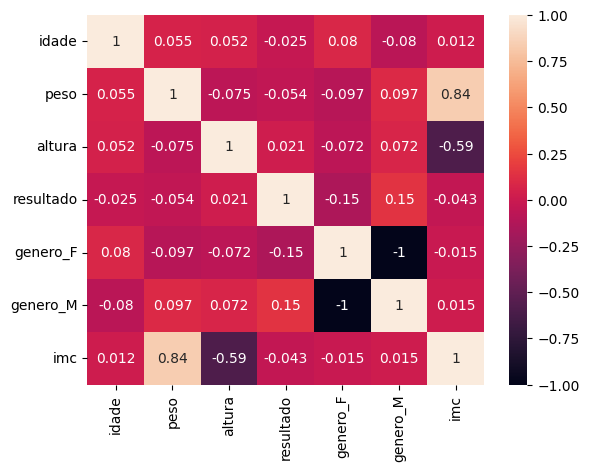

In [37]:
# Apresentar um mapa de calor com correlação entre as variáveis
sns.heatmap(df_exames.corr(), vmin=-1, vmax=1 ,annot=True)

<Axes: >

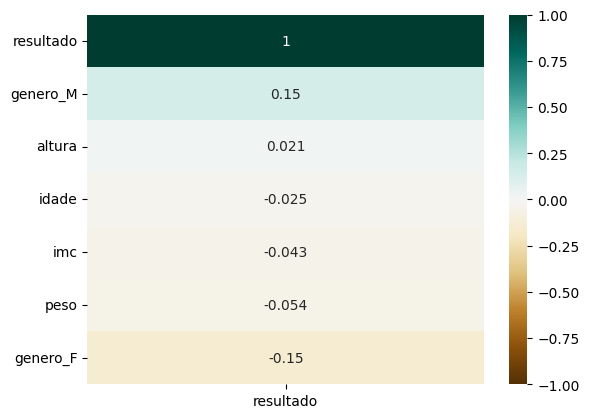

In [38]:
# Mapa de correlação só com a variável target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1 ,annot=True, cmap='BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

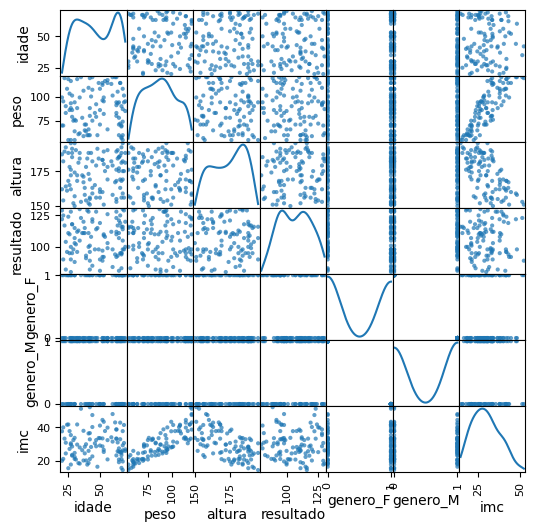

In [39]:
# Plot de Scatter (Dispersão) com Distribuição
pd.plotting.scatter_matrix(df_exames, alpha=0.7, figsize=(6,6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>,
        <Axes: title={'center': 'imc'}>, <Axes: >]], dtype=object)

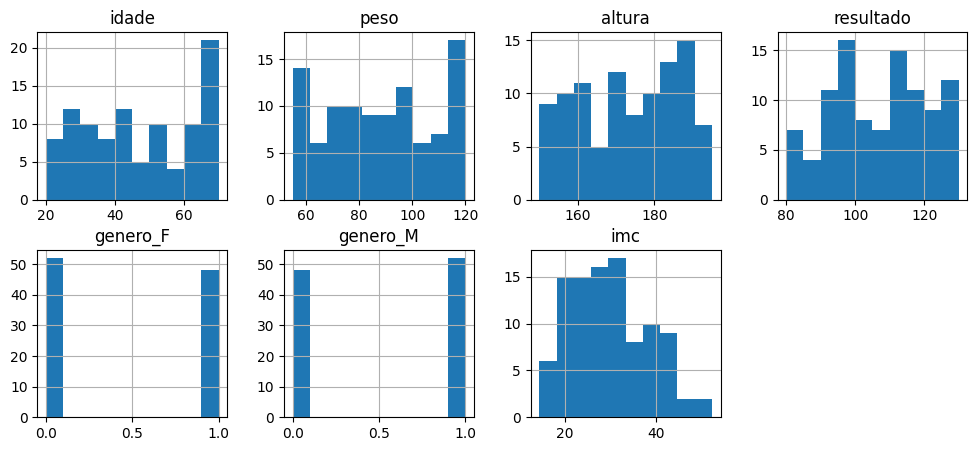

In [45]:
# Histograma de todas as variáveis
df_exames.hist(layout=(2,4), figsize=(12,5))

In [34]:
# Criar uma feature nova (IMC)
# IMC = Peso(kg) / Altura(m) ^2

df_exames['imc'] = df_exames.peso / ((df_exames.altura/100) ** 2)

In [35]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


In [36]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      100 non-null    int64  
 1   peso       100 non-null    int64  
 2   altura     100 non-null    int64  
 3   resultado  100 non-null    int64  
 4   genero_F   100 non-null    int64  
 5   genero_M   100 non-null    int64  
 6   imc        100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


In [46]:
#exemplo regressao linear simples

dict_regressao = {
    'tempo_casa': [1,3,6,9,10,14,18],
    'salario': [1500,3000,4500,6000,7000,8500,10000]
}

In [47]:
df_reg_simples = pd.DataFrame.from_dict(dict_regressao)

<Axes: xlabel='tempo_casa', ylabel='salario'>

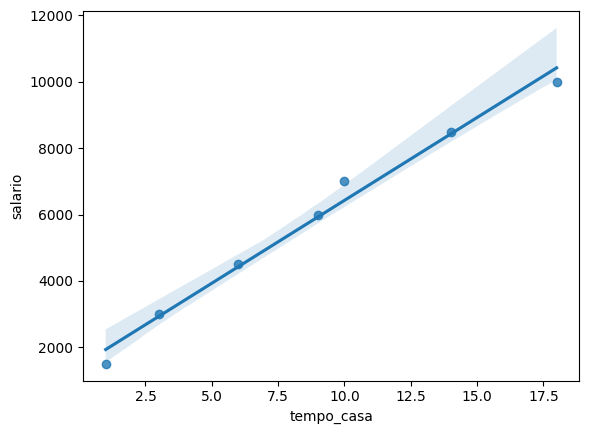

In [49]:
sns.regplot(data=df_reg_simples, x='tempo_casa', y='salario')

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [54]:
# modelo 1 - Sem IMC
X = df_exames.drop(columns=['imc', 'resultado'])
y = df_exames['resultado']

In [55]:
# Dividir conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [61]:
y_test

71     92
43    103
11    115
83    112
78    126
19    116
80     81
4     100
79    120
75    110
72    100
44    130
46    102
90     97
56    123
2      93
47    123
51    116
0      98
97    125
65     93
12    111
32    107
82    128
66     96
14     80
81    119
91    113
15     91
74    128
Name: resultado, dtype: int64

In [62]:
# Treinar o algoritmo de regressão linear - Modelo 1
model_1 = LinearRegression().fit(X_train, y_train)

In [63]:
# Gerar predições do conjunto de teste com base no modelo
y_pred = model_1.predict(X_test)

In [65]:
# Equacao da Reta - Regressao Linear
# y = ax + b
# ver valores de a
model_1.coef_

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [66]:
# ver valores de b
model_1.intercept_

np.float64(94.21133142019856)

In [67]:
# Quanto x explica y
# R2 score - (Conjunto de treinamento)
model_1.score(X_train, y_train)

0.06218388634297234

In [68]:
# R2 score - Conjunto de teste
model_1.score(X_test, y_test)

-0.1364090447910642

In [69]:
# R2 Score - Testes
r2_score(y_test, y_pred)

-0.1364090447910642

In [70]:
# MAE (Mean absolute error)
# residuo
mean_absolute_error(y_test, y_pred)

np.float64(12.695569181179541)

In [73]:
# modelo 2 - Apenas IMC
X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

In [74]:
# Dividir conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [75]:
# TRreinar o algoritmo de regressão linear
model_2 = LinearRegression().fit(X_train, y_train)

In [76]:
# Gerar predições do conjunto de teste com base no modelo
y_pred = model_2.predict(X_test)

In [81]:
model_2.coef_

array([-0.21677589])

In [82]:
model_2.intercept_

np.float64(112.15019229088836)

In [78]:
# Quanto x explica y
# R2 score - (Conjunto de treinamento)
model_2.score(X_train, y_train)

0.015285962664806862

In [80]:
# R2 score - Conjunto de teste
model_2.score(X_test, y_test)

-0.0889832856240178

In [83]:
# MAE (Mean absolute error)
# residuo
mean_absolute_error(y_test, y_pred)

np.float64(12.505651407060103)

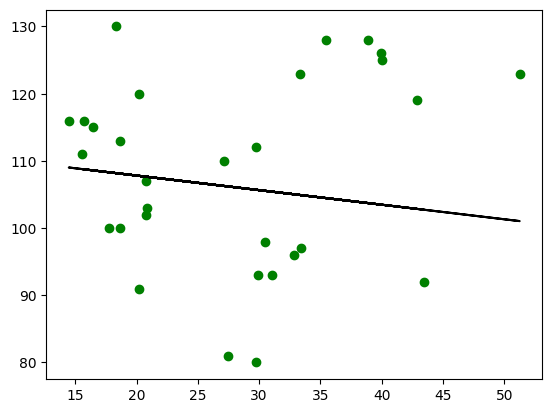

In [87]:
# Mostrar como a reta foi calculada
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, y_pred, color='k')